In [1]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading data from json file
data = pd.read_csv("Cleaned_tweets.csv")

In [3]:
data.head(15)

,Unnamed: 0,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,704,ass,DeborahParr,1.330000e+18,11-11-2020 06:56,0,NaN,NaN,1,He’d have my phone wedged up his ass sideways.,NaN,NaN,NaN
1,1915,boobies,MaxZorin85,1.330000e+18,11-11-2020 07:35,4,NaN,NaN,0,Yep 100% agree and the same with severine in s...,NaN,NaN,NaN
2,2856,eat pussy,PRISJ1_,1.330000e+18,11-11-2020 10:36,0,NaN,NaN,1,Stop having sex with men that won’t eat your p...,NaN,NaN,NaN
3,2163,Breast Man,Teresamckenzy1,1.330000e+18,10-11-2020 20:52,0,NaN,NaN,1,"When you see a sad man, just give him breast t...",NaN,NaN,NaN
4,2852,eat pussy,sj__vazquez,1.330000e+18,11-11-2020 10:42,0,NaN,NaN,1,We can't be together if you don't eat pussy,NaN,NaN,NaN
5,2040,boobies,sushiluvsyou,1.330000e+18,11-11-2020 06:08,1,NaN,NaN,1,// nsfw ( ? ) SAMATOKI BOOBIES BIG BAHONKA DON...,NaN,NaN,NaN
6,1438,big butt,alissajo17,1.330000e+18,11-11-2020 06:30,1,NaN,NaN,0,I wish I could give my bitmoji a big butt,NaN,NaN,NaN
7,257,Aroused,NikkiBogopo,1.330000e+18,10-11-2020 21:37,0,NaN,NaN,1,Is there a word for hungry and aroused like “h...,NaN,NaN,NaN
8,173,Aroused,IquantumstateI,1.330000e+18,10-11-2020 22:17,0,NaN,NaN,1,Licking your whole body until you become so ar...,NaN,NaN,NaN
9,2991,eat pussy,urcuddlybaby,1.330000e+18,11-11-2020 08:05,0,NaN,NaN,1,i think it would be lots of fun for me to eat ...,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

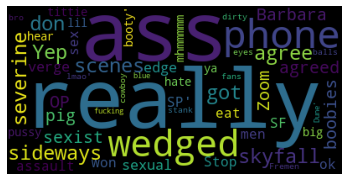

In [5]:
text = data['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

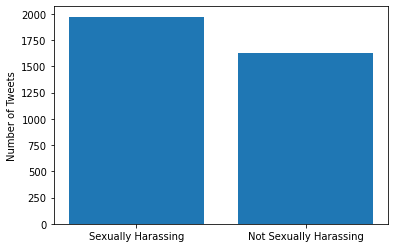

In [6]:
#Visualization
sh=0
for i in range(len(data["Label"])):
    if data["Label"].iloc[i]==1:
        sh+=1
normal=len(data["Label"])-sh
label_values={"Sexually Harassing" : sh, "Not Sexually Harassing" : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

In [7]:
print("No. of Label 1 tweets")
print(len(data[data["Label"].isin([1])]))
print("No. of Label 0 tweets")
print(len(data[data["Label"].isin([0])]))
print("Class Balance Ratio")
print((len(data[data["Label"].isin([1])]))/len(data))

No. of Label 1 tweets
1973
No. of Label 0 tweets
1631
Class Balance Ratio
0.5474472807991121


In [8]:
# Getting features and labels
features = data['Text']
labels = data['Label']

In [9]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [10]:
# Vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [11]:
# Getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [12]:
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) 
print(lsvc.score(features_test, labels_test))
y_pred = lsvc.predict(features_test)


0.9778009018383628
0.768377253814147


In [13]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.765911366442118
0.768377253814147
0.7680773485932246
[0.74188563 0.78993711]
0.789937106918239


In [14]:

from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7653447526841681
0.768377253814147
0.768377253814147
[0.73170732 0.79898219]
[0.73170732 0.79898219]


In [15]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7667228122709338
0.768377253814147
0.7680184592626068
[0.7523511  0.78109453]
[0.7523511  0.78109453]


In [16]:
# Using Gaussuan Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))  
print(gnb.score(features_test, labels_test))
y_pred = gnb.predict(features_test)

0.9084287200832466
0.6310679611650486


In [17]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.6068347683476835
0.6310679611650486
0.6156345311025926
[0.50922509 0.70444444]
0.7044444444444444


In [18]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.613673741699249
0.6310679611650486
0.6310679611650486
[0.42073171 0.80661578]
[0.42073171 0.80661578]


In [19]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.6350531807037918
0.6310679611650486
0.6341690876320569
[0.64485981 0.62524655]
[0.64485981 0.62524655]


In [20]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))  
print(lr.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.8935137010058967
0.768377253814147


In [21]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7648746233623709
0.768377253814147
0.7674617935824328
[0.73617694 0.79357231]
0.7935723114956736


In [22]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7635798733941538
0.768377253814147
0.768377253814147
[0.71036585 0.81679389]
[0.71036585 0.81679389]


In [23]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7677845208070618
0.768377253814147
0.7681316167121117
[0.76393443 0.77163462]
[0.76393443 0.77163462]


In [24]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train)) 
print(rfc.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9812695109261186
0.7156726768377254


In [25]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7648746233623709
0.768377253814147
0.7674617935824328
[0.73617694 0.79357231]
0.7935723114956736


In [26]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7635798733941538
0.768377253814147
0.768377253814147
[0.71036585 0.81679389]
[0.71036585 0.81679389]


In [27]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7677845208070618
0.768377253814147
0.7681316167121117
[0.76393443 0.77163462]
[0.76393443 0.77163462]


In [28]:
#Linear Support Vector Classifier
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(features_train, labels_train)
print(lin_clf.score(features_train, labels_train)) 
print(lin_clf.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9778009018383628
0.768377253814147


In [29]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7648746233623709
0.768377253814147
0.7674617935824328
[0.73617694 0.79357231]
0.7935723114956736


In [30]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7635798733941538
0.768377253814147
0.768377253814147
[0.71036585 0.81679389]
[0.71036585 0.81679389]


In [31]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7677845208070618
0.768377253814147
0.7681316167121117
[0.76393443 0.77163462]
[0.76393443 0.77163462]


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))

0.7600554785020804


In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(features_train, labels_train)
print(neigh.score(features_test, labels_test))

0.7004160887656034


In [36]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))

0.753120665742025


In [37]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))

0.7267683772538142


In [43]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))

0.768377253814147
